# Completing the grid
* This code completes the grid of 'pocillos' to a full $8x12$ plate.
* It needs to have at least 2 detected pocillos in each row (otherwise won't be able to perform line o best fit).
* Not true! It can deal with empty (or 1 pocillo) rows in the middle.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from imageproc import get_pocillos, complete_the_grid, draw_circles, get_mean_vals_array, circle_crop

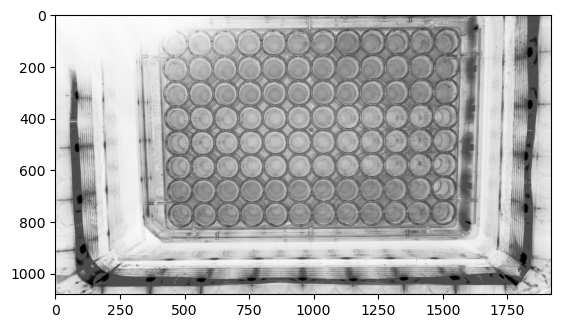

In [6]:
# Working well!
#img = cv2.imread('pics/Picture_Senyal_10M5_#1_2023-04-25_15:05:18_P4_Cam6.jpg')
#img = cv2.imread('pics/Picture_Senyal_10M5_#1_2023-04-25_15:05:18_P4_Cam5.jpg')
#img = cv2.imread('pics/Picture_Senyal_10M5_#1_2023-04-25_15:05:18_P4_Cam3.jpg')
#img = cv2.imread('pics/Picture_Senyal_10M5_#1_2023-04-25_12:59:19_P4_Cam3.jpg')
#img = cv2.imread('pics/Picture_g_10M5_#1_2023-04-19_14:32:22_P4_Cam3.jpg')
         
img = cv2.imread('/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/03. KOA DATA/AutomataLab/pics/_home_pi_Pictures_Picture____2023-05-02_13_23_49_P1_Cam3.jpg')
    
# Not so much...
#img = cv2.imread('pics/Picture_Senyal_10M5_#1_2023-04-25_15:05:18_P4_Cam4.jpg')



img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_bw, cmap="binary")
plt.show()

### Detecting pocillos

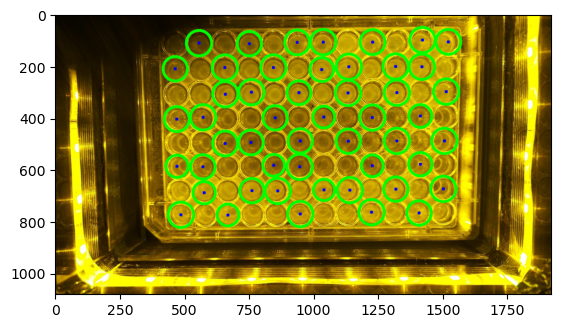

In [3]:
circles = get_pocillos(img_bw)
draw_circles(img, circles)

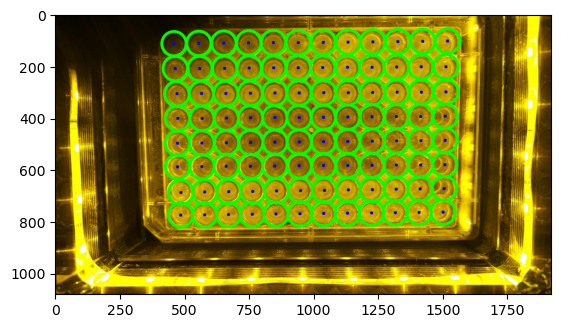

In [8]:
new_circles = complete_the_grid(circles)
draw_circles(img, new_circles)

### Completing the grid *code*
* For every row, I fit two linear functions (one for each point coordinate) and I use that to recalculate *all centers* from that row.
* The new radius is set to be 80.

In [ ]:
max_row, min_row, max_col, min_col = circles[:,3].max(), circles[:,3].min(), circles[:,4].max(), circles[:,4].min()

In [ ]:
new_circles = []
new_rad = round(circles[:,2].mean())

for i in range(max_row+1):
    row = circles[circles[:,3]==i]
    
    if len(row)>1:
        x = row[:,4]
        y0 = row[:,0]
        y1 = row[:,1]

        def f0(n):
            slope0, intercept0 = np.polyfit(x,y0,1)
            return round(intercept0 + n*slope0)
        def f1(n):
            slope1, intercept1 = np.polyfit(x,y1,1)
            return round(intercept1 + n*slope1)

        for j in range(max_col+1):
            new_circles.append([f0(j), f1(j), new_rad, i, j])
            
new_circles = np.array(new_circles)

In [ ]:
# The following computes an average vertical displacement between two rows of pocillos
rows_available = np.unique(new_circles[:,3])
rows_available[0], rows_available[1]
first_row_available = rows_available[0]
second_row_available = rows_available[1]
first_mean_height = np.mean(circles[circles[:, 3]==first_row_available][:,1])
second_mean_height = np.mean(circles[circles[:, 3]==second_row_available][:,1])
vertical_displacement = (second_mean_height - first_mean_height)/(second_row_available-first_row_available)

In [ ]:
# This code adds missing rows 
for i in range(min_row, max_row+1):
    if len(new_circles[new_circles[:,3]==i])==0:
        current_row = new_circles[new_circles[:,3]==i-1]
        current_row[:,1] += round(vertical_displacement)
        current_row[:,3] += 1
        new_circles = np.vstack([new_circles, current_row])
#new_circles[np.argsort(new_circles[:,3])]

In [ ]:
new_circles = np.array(new_circles)
draw_circles(img, new_circles)

In [ ]:
if len(new_circles)==96:
    print("Good job!")